# Tutorials

This is the first of many tutorials about how to get the best out of overreact.

## Reaction rate constants

There are functions for calculating reaction rate constants from energy deltas.
But first we need an energy barrier:

In [1]:
import numpy as np
from overreact import constants

delta_freeenergy = np.array([17.26, 18.86]) * constants.kcal
delta_freeenergy  # J/mol

array([72215.84, 78910.24])

Functions in overreact that receive energy values require values in joules per
mole. Above, a conversion from kcal per mole was done automatically. Now we can
calculate our rates:

In [2]:
import overreact as rx

k = rx.rates.eyring(delta_freeenergy)
k  # s-1 if first order

array([1.38546089, 0.09306495])

(Temperature is 298.15 K by default.)
Simple concurrent first order reactions using the rates above would be:

Text(0, 0.5, 'Concentration (M)')

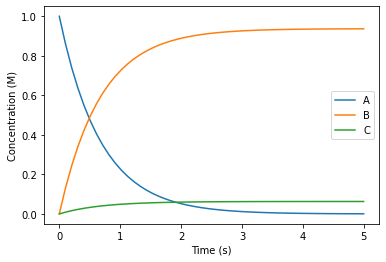

In [3]:
import matplotlib.pyplot as plt

scheme = rx.parse_reactions("""
    A -> AB‡ -> B
    A -> AC‡ -> C
""")
dydt = rx.get_dydt(scheme, k)
y, r = rx.get_y(dydt, y0=[1.0, 0.0, 0.0, 0.0, 0.0])
t = np.linspace(y.t_min, 5.0)

for i, compound in enumerate(scheme.compounds):
   if not compound.endswith("‡"):
       plt.plot(t, y(t)[i], label=compound)

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Concentration (M)")

A 5-seconds simulation of two concurrent first order reactions. The reaction
that produces C is much too slow in comparison with the one producing B.

### But I don't have energy deltas

Don't worry. Models parsed by overreact store a matrix $B$ that sets the
relationship between reactants and eventually existing transition states. This
is a transformation from absolute state energies to deltas of energy relative
to the reactions in the model:

In [4]:
scheme.B

((-1.0, -1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0))

In [5]:
rx.get_delta(scheme.B, [1.92, 19.18, 2.15, 20.78, 3.40])

array([17.26, 18.86])

The returned energies can be used as above.